# Chapter 1 - Linear Regression with One Predictor Variable

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

DATA_DIR = "../data"
yhat = '\u0177'
square = '\u00b2'

# 1.1 Relations between Variables (p 2)

### Figure 1.1 (p 3)

Example of Functional Relationship

Consider the functional relationship between number of units sold and the dollar sales with a price per unit of $2. This is an exact relationship described in a simple dataset.

Text(53, 100, '⟵ Y = 2X')

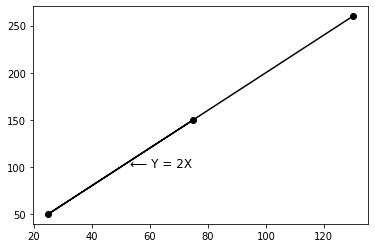

In [19]:
plt.plot("X", "Y", 'o-k', data = pd.DataFrame({
    "X": [75, 25, 130],
    "Y": [150, 50, 260]
}))
plt.text(53, 100, "\u27f5 Y = 2X", ha="left", size="large")

### Figure 1.2 (p 4)

Statistical Relation between Midyear Performance Evaluation and Year-End Evaluation 

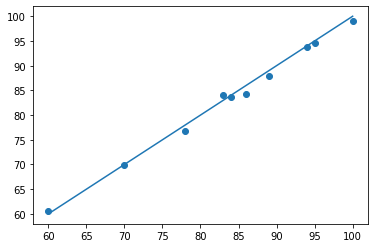

In [25]:
X = [60, 70, 78, 83, 84, 86, 89, 94, 95, 100]
Y = X + np.random.normal(0,1, len(X))
plt.scatter(X, Y)
plt.plot(X, X)

# 1.2 Regression Models and Their Uses (p 5)

# 1.3 Simple Linear Regression Model with Distribution of Error Terms Unspecified (p 9)

# 1.4 Data for Regression Analysis (p 12)

# 1.5 Overview of Steps in Regression Analysis (p 13)

# 1.6 Estimation of Regression Function

### Input the Toluca Company Data

In [19]:
df = pd.read_pickle(f"{DATA_DIR}/CH01TA01.xz")
df.columns = ['x', 'y']

### Table 1.1 (p 19)

Data on Lot Size and Work Hours and Needed Calculations for Least Squares Estimates -- Toluca Company Example

##### Note

While I don't like to do it, I am showing how you can add summary "rows" into your data frame. Summary information shouldn't mix in a detailed table in production!

In [21]:
tbl = df-df.mean()
tbl = pd.concat([df, tbl, tbl.x*tbl.y, tbl.x**2, tbl.y**2], axis=1)
tbl.columns = ["x", "y", "devx", "devy", "crp", f"devx{square}", f"devy{square}"]
tbl.loc['Total'] = tbl.sum()
tbl.at['Mean', 'x'] = df.x.mean()
tbl.at['Mean', 'y'] = df.y.mean()
tbl.round(2)

,x,y,devx,devy,crp,dev²,devy²
0,80.0,399.00,10.0,86.72,867.2,100.0,7520.36
1,30.0,121.00,-40.0,-191.28,7651.2,1600.0,36588.04
2,50.0,221.00,-20.0,-91.28,1825.6,400.0,8332.04
3,90.0,376.00,20.0,63.72,1274.4,400.0,4060.24
4,70.0,361.00,0.0,48.72,0.0,0.0,2373.64
5,60.0,224.00,-10.0,-88.28,882.8,100.0,7793.36
6,120.0,546.00,50.0,233.72,11686.0,2500.0,54625.04
7,80.0,352.00,10.0,39.72,397.2,100.0,1577.68
8,100.0,353.00,30.0,40.72,1221.6,900.0,1658.12
9,50.0,157.00,-20.0,-155.28,3105.6,400.0,24111.88


### Figure 1.11 (p 20)

Example Regression Output -- Toluca Company Example

In [8]:
model = sm.OLS(df.y, sm.add_constant(df.x)) # nonformula way
display(ols("y ~ 1", df).fit().summary()) # better have better SSE than this
model = ols("y ~ x", data=df).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 07 May 2021   Prob (F-statistic):                nan
Time:                        15:47:16   Log-Likelihood:                -153.18
No. Observations:                  25   AIC:                             308.4
Df Residuals:                      24   BIC:                             309.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    312.2800     22.628     13.801      0.000     265.579     358.981
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   2.271
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.599
Skew:                          -0.073   Prob(JB):                        0.741
Kurtosis:                       2.256   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.45e-10
Time:                        15:46:52   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3659     26.177      2.382      0.026       8.214     116.518
x              3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Figure 1.10 (p 20)

Scatter Plot and Fitted Regression Line -- Toluca Company Example

##### Note

In later notebooks I will demonstrate how to construct these plots manually via `pyplot`

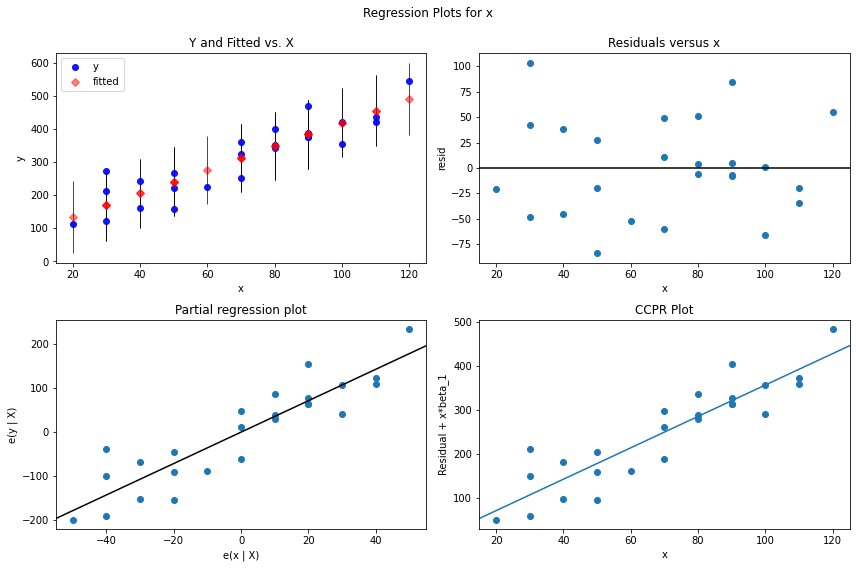

In [6]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x', fig=fig)

### Table 1.2 (p 22)

Fitted Values, Residuals, and Squared Residuals -- Toluca Company Example

In [7]:
residuals = model.resid
fitted = model.fittedvalues
tbl = pd.concat([df, fitted, residuals, residuals**2], axis=1)
tbl.columns = ['x', 'y', yhat, 'e', f'e{square}']
tbl.loc['total'] = tbl.sum()
tbl.round(2)

,x,y,ŷ,e,e²
0,80.0,399.0,347.98,51.02,2602.83
1,30.0,121.0,169.47,-48.47,2349.53
2,50.0,221.0,240.88,-19.88,395.05
3,90.0,376.0,383.68,-7.68,59.04
4,70.0,361.0,312.28,48.72,2373.64
5,60.0,224.0,276.58,-52.58,2764.44
6,120.0,546.0,490.79,55.21,3048.13
7,80.0,352.0,347.98,4.02,16.14
8,100.0,353.0,419.39,-66.39,4407.11
9,50.0,157.0,240.88,-83.88,7035.18


# 1.7 Estimation of Error Terms Variance $\sigma^2$ (p 24)

# 1.8 Normal Error Regression Model (p 26)

# References

[Linear Model Regression Results (statsmodels)](https://www.statsmodels.org/v0.12.1/generated/statsmodels.regression.linear_model.RegressionResults.html)

[Contrast Coding (statsmodels)](https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html)

[QQ Plot or Normal Probability Plot (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

[Levene or Brown-Forsythe Test (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

[Z-Score Transformation (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

[Box Cox Transformations (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

### Graphics

[Pandas Plotting](https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html)

[Matplotlib Color Maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)